<a href="https://colab.research.google.com/github/kzeynep/Python_Atil_hoca/blob/main/LightGBMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = sns.load_dataset("titanic")

In [102]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [104]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Keşifsel Analiz (EDA)

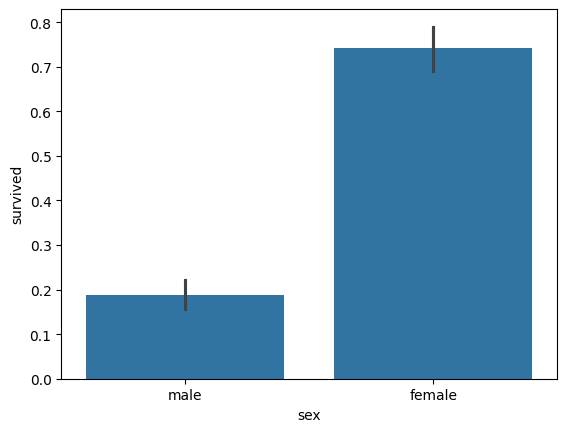

In [105]:
sns.barplot(data = df , x ="sex" , y ="survived")
plt.show()

In [106]:
df["sex"].value_counts()

,count
sex,
male,577
female,314


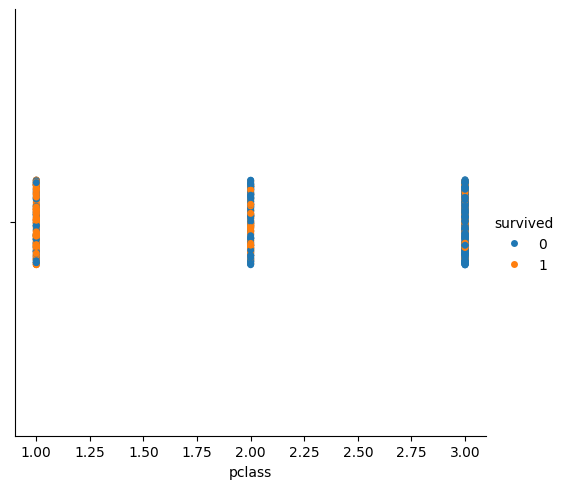

In [107]:
sns.catplot(data = df , x ="pclass" , hue ="survived" , kind ="strip")
plt.show()

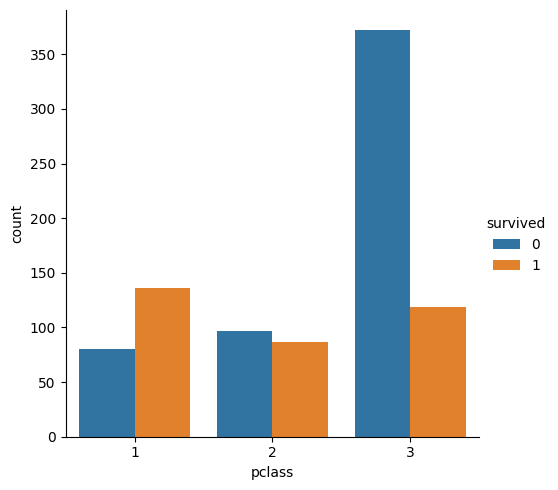

In [108]:
sns.catplot(data = df , x ="pclass" , hue ="survived" , kind ="count")
plt.show()

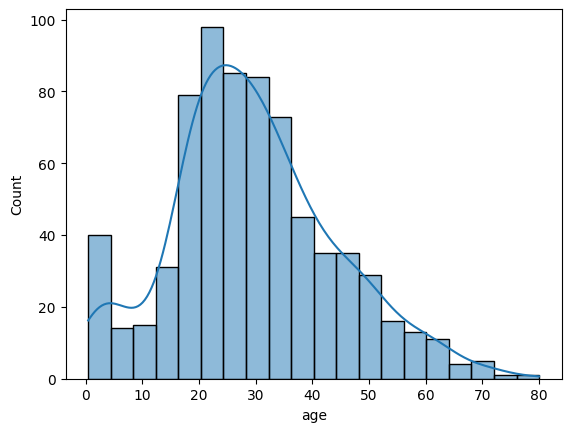

In [109]:
sns.histplot(data = df , x ="age" , kde = True)
plt.show()


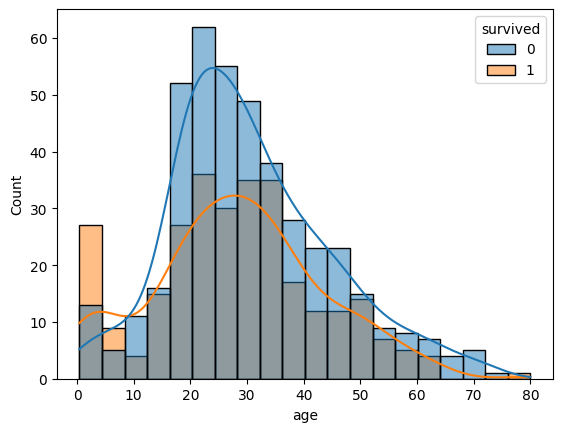

In [110]:
sns.histplot(data = df , x ="age" , hue = "survived" , kde = True)
plt.show()


In [111]:
df["who"].value_counts()

,count
who,
man,537
woman,271
child,83


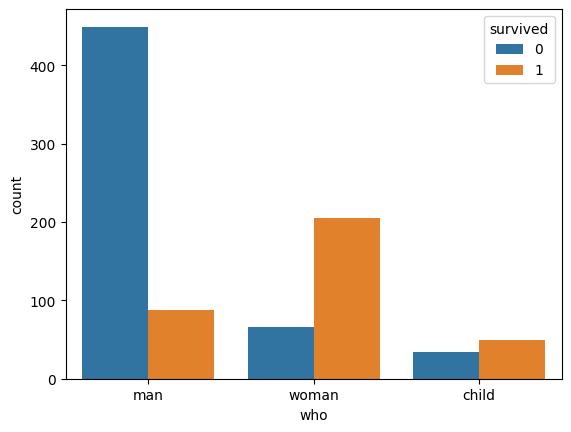

In [112]:
sns.countplot(data = df , x ="who", hue = "survived")
plt.show()

In [113]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [114]:
df = df.drop(["deck" , "embark_town" , "alive"] , axis =1)

In [115]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [116]:
df["age"] = df["age"].fillna(df["age"].median())

In [117]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [118]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [120]:
df["adult_male"] = df["adult_male"].astype(int)
df["alone"] = df["alone"].astype(int)

In [121]:
X = df.drop("survived" , axis = 1)
y = df["survived"]

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)


In [124]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [125]:
categorical_cols = ["sex" , "embarked" , "class" , "who"]

preprocessor = ColumnTransformer(transformers = [("encoder" , OneHotEncoder() , categorical_cols)] , remainder = "passthrough")

In [126]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [127]:
encoded_cols = preprocessor.get_feature_names_out()

In [128]:
X_train = pd.DataFrame(X_train , columns = encoded_cols)

In [129]:
X_test = pd.DataFrame(X_test , columns=encoded_cols)

In [130]:
!pip install lightgbm

In [131]:
import lightgbm as lgb

In [132]:
from sklearn.metrics import classification_report , confusion_matrix

In [133]:
clf = lgb.LGBMClassifier(verbose = -1)

In [134]:
clf.fit(X_train , y_train)

LGBMClassifier(verbose=-1)

In [135]:
y_pred = clf.predict(X_test)

In [136]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[88 17]
 [17 57]]


In [137]:
clf.feature_importances_

array([  28,   15,   57,   13,   71,   12,   31,   46,    0,   39,   29,
          8,  941,   58,   80, 1220,    0,   51], dtype=int32)

In [138]:
X_train.columns

Index(['encoder__sex_female', 'encoder__sex_male', 'encoder__embarked_C',
       'encoder__embarked_Q', 'encoder__embarked_S', 'encoder__class_First',
       'encoder__class_Second', 'encoder__class_Third', 'encoder__who_child',
       'encoder__who_man', 'encoder__who_woman', 'remainder__pclass',
       'remainder__age', 'remainder__sibsp', 'remainder__parch',
       'remainder__fare', 'remainder__adult_male', 'remainder__alone'],
      dtype='object')

In [139]:
importances = clf.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
feature_importance

,feature,importance
15,remainder__fare,1220
12,remainder__age,941
14,remainder__parch,80
4,encoder__embarked_S,71
13,remainder__sibsp,58
2,encoder__embarked_C,57
17,remainder__alone,51
7,encoder__class_Third,46
9,encoder__who_man,39
6,encoder__class_Second,31


In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
lgb_model = lgb.LGBMClassifier()

In [142]:
params = {
    "n_estimators" : [100 , 200 ,300,400],
    "learning_rate" : [0.01 , 0.5,0.3,1],
    "max_depth" : [3,4,5,6],
    "num_leaves" : [15,32,64,128],
    "min_child_samples" : [10,20,30,40],
    "subsample" : [0.8,0.9,1],
    "colsample_bytree" : [0.8,0.9,1]
}



In [143]:
random_search = RandomizedSearchCV(estimator =lgb_model , param_distributions = params , cv= 5, scoring ="accuracy" , verbose =1 , n_jobs=-1)

In [144]:
random_search.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1],
                                        'learning_rate': [0.01, 0.5, 0.3, 1],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_samples': [10, 20, 30, 40],
                                        'n_estimators': [100, 200, 300, 400],
                                        'num_leaves': [15, 32, 64, 128],
                                        'subsample': [0.8, 0.9, 1]},
                   scoring='accuracy', verbose=1)

In [145]:
random_search.best_params_

{'subsample': 0.8,
 'num_leaves': 128,
 'n_estimators': 100,
 'min_child_samples': 30,
 'max_depth': 3,
 'learning_rate': 0.5,
 'colsample_bytree': 1}

In [146]:
y_pred = random_search.predict(X_test)

In [147]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

[[92 13]
 [18 56]]


In [148]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(X_train , y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[85 20]
 [18 56]]


In [149]:
param_grid = {
    "n_estimators" : [100 , 200 ,300,400],
    "learning_rate" : [0.01 , 0.5,0.3,1],
    "max_depth" : [3,4,5,6],
    "num_leaves" : [15,32,64,128],
    "min_child_samples" : [10,20,30,40],
    "subsample" : [0.8,0.9,1],
    "colsample_bytree" : [0.8,0.9,1]
}

In [150]:
random_search = RandomizedSearchCV(estimator = XGBClassifier() , param_distributions = param_grid , cv = 5 , scoring ="accuracy", n_jobs =-1)

In [151]:
random_search.fit(X_train , y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:54:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "num_leaves" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1],
                                        'learning_rate': [0.01, 0.5, 0.3, 1],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_samples': [10, 20, 30, 40],
                                        'n_estimators': [100, 200, 300, 400],
                                        'num_leaves': [15, 32, 64, 128],
                                        'subsample': [0.8, 0.9, 1]},
                   scoring='accuracy')

In [151]:
y_pred = random_search.predict(X_test)

In [152]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[85 20]
 [18 56]]
